<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Daten-vorbereiten" data-toc-modified-id="Daten-vorbereiten-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Daten vorbereiten</a></span></li><li><span><a href="#DB-Scan-mit-allen-Kategorien" data-toc-modified-id="DB-Scan-mit-allen-Kategorien-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DB-Scan mit allen Kategorien</a></span><ul class="toc-item"><li><span><a href="#Test-von-verschiedenen-Parametern" data-toc-modified-id="Test-von-verschiedenen-Parametern-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Test von verschiedenen Parametern</a></span></li><li><span><a href="#Visualisieren" data-toc-modified-id="Visualisieren-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualisieren</a></span></li><li><span><a href="#Versuch-mit-TSNE" data-toc-modified-id="Versuch-mit-TSNE-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Versuch mit TSNE</a></span></li></ul></li><li><span><a href="#DBScan-mit-Sport-+-Tech-+-Politics" data-toc-modified-id="DBScan-mit-Sport-+-Tech-+-Politics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DBScan mit Sport + Tech + Politics</a></span><ul class="toc-item"><li><span><a href="#Versuch-mit-TSNE" data-toc-modified-id="Versuch-mit-TSNE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Versuch mit TSNE</a></span></li></ul></li><li><span><a href="#DBScan-mit-Sport-+-Tech-+-Politics-+-Entertainment" data-toc-modified-id="DBScan-mit-Sport-+-Tech-+-Politics-+-Entertainment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>DBScan mit Sport + Tech + Politics + Entertainment</a></span></li></ul></div>

# Imports

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Daten vorbereiten

In [2]:
df = pd.read_csv('../../Datensaetze/news_POS_POS_tags_nouns_adjectives_verb.csv')

In [3]:
df.head(2)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,415.0,244.0,quarterli profit at US media giant timewarn j...,"['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...",high fourth own fourth underlying exceptional ...,74.0,22.0,1.0
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,379.0,230.0,the dollar ha hit it highest level against th...,"['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...",late recent sanguine current current next shar...,66.0,30.0,9.0


In [4]:
#data1 = df[df['Genre1'] == 'Jazz']
#data2 = df[df['Genre1'] == 'Hip Hop']
#data3 = df[df['Genre1'] == 'Electronic']
#data4 = df[df['Genre1'] == 'Folk, World, & Country']
#genres = pd.concat([data1, data2,data3, data4], axis = 0)
#genres.head(2)

In [5]:
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(df.content)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

# DB-Scan mit allen Kategorien 

In [6]:
def dbscan(eps, min_samples, metric, array): 
    clustering = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    clusters = clustering.fit(array)
    labels = clusters.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    return 'n_clusters_', n_clusters_, 'n_noise_', n_noise_

## Test von verschiedenen Parametern

eps: Der maximale Abstand zwischen zwei Proben, damit die eine als in der Nachbarschaft der anderen betrachtet werden kann. Hierbei handelt es sich nicht um ein Maximum, das an die Abstände von Punkten innerhalb eines Clusters gebunden ist. Dies ist der wichtigste DBSCAN-Parameter, den Sie für Ihren Datensatz und Ihre Abstandsfunktion passend auswählen müssen.

min_samples: Die Anzahl der Proben (oder das Gesamtgewicht) in einer Nachbarschaft für einen Punkt, der als Kernpunkt betrachtet wird. Dies schließt den Punkt selbst ein.

In [7]:
eps = [0.5, 0.9, 1, 1.5, 5, 10, 25, 50, 75, 100]
min_samples = [5, 10, 20, 30, 50, 75, 100]
for e in eps:
    for m in min_samples:
        print('e: ',e, 'm:',m ,dbscan(e, m, 'cosine', tf_idf_array))

e:  0.5 m: 5 ('n_clusters_', 24, 'n_noise_', 2019)
e:  0.5 m: 10 ('n_clusters_', 5, 'n_noise_', 2159)
e:  0.5 m: 20 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.5 m: 30 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.5 m: 50 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.5 m: 75 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.5 m: 100 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.9 m: 5 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 10 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 20 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 30 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 50 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 75 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 100 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 5 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 10 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 20 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 30 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 50 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 75 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 100 ('n_clusters_', 1,

## Visualisieren

Text(0, 0.5, 'Feature 1')

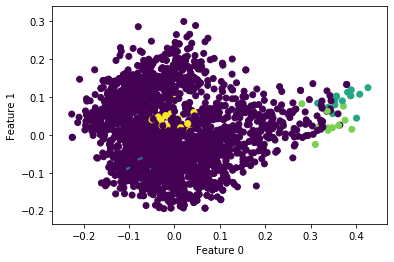

In [11]:
#bestes Ergebnis anwenden: eps=0.5, min_samples=10

clustering = DBSCAN(eps=0.5, min_samples=10, metric='cosine')
clusters = clustering.fit(tf_idf_array)
labels = clusters.labels_

sklearn_pca = PCA(n_components = 5)
data = sklearn_pca.fit_transform(tf_idf_array)

plt.scatter(data[:, 0], data[:, 1], c=clusters.labels_, cmap="viridis")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#plt.savefig('')

## Versuch mit TSNE

In [12]:
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(df.content)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [13]:
def dbscan(eps, min_samples, metric, array): 
    clustering = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    clusters = clustering.fit(array)
    labels = clusters.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    return 'n_clusters_', n_clusters_, 'n_noise_', n_noise_

In [14]:
eps = [0.5, 0.9, 1, 1.5, 5, 10, 25, 50, 75, 100]
min_samples = [5, 10, 20, 30, 50, 75, 100]
for e in eps:
    for m in min_samples:
        print('e: ',e, 'm:',m ,dbscan(e, m, 'cosine', tf_idf_array))

e:  0.5 m: 5 ('n_clusters_', 24, 'n_noise_', 2019)
e:  0.5 m: 10 ('n_clusters_', 5, 'n_noise_', 2159)
e:  0.5 m: 20 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.5 m: 30 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.5 m: 50 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.5 m: 75 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.5 m: 100 ('n_clusters_', 0, 'n_noise_', 2225)
e:  0.9 m: 5 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 10 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 20 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 30 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 50 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 75 ('n_clusters_', 1, 'n_noise_', 0)
e:  0.9 m: 100 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 5 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 10 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 20 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 30 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 50 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 75 ('n_clusters_', 1, 'n_noise_', 0)
e:  1 m: 100 ('n_clusters_', 1,

Text(0, 0.5, 'Feature 1')

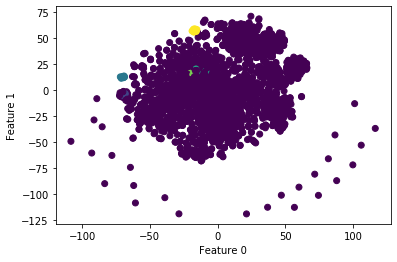

In [17]:
#e:  0.5 m: 10 bestes Ergebnis

from sklearn.manifold import TSNE

clustering = DBSCAN(eps=0.5, min_samples=10, metric='cosine')
clusters = clustering.fit(tf_idf_array)
labels = clusters.labels_


sklearn_tsne = TSNE(n_components=2)
data = sklearn_tsne.fit_transform(tf_idf_array)

#sklearn_pca = PCA(n_components = 2)
#data = sklearn_pca.fit_transform(tf_idf_array)

plt.scatter(data[:, 0], data[:, 1], c=clusters.labels_, cmap="viridis")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#plt.savefig('')

# DBScan mit Sport + Tech + Politics

In [64]:
data1 = df[df['category'] == 'sport']
data2 = df[df['category'] == 'tech']
data3 = df[df['category'] == 'politics']

cats3 = pd.concat([data1, data2, data3], axis = 0)
cats3.head(2)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
1313,sport,001.txt,Claxton hunting first major medal,British hurdler Sarah Claxton is confident sh...,206.0,145.0,british hurdler sarah claxton is confid she c...,"['_SP', 'JJ', 'NN', 'NNP', 'NNP', 'VBZ', 'JJ',...",British confident first major next old British...,29.0,22.0,5.0
1314,sport,002.txt,O'Sullivan could run in Worlds,Sonia O'Sullivan has indicated that she would...,139.0,103.0,sonia o'sullivan ha indic that she would like...,"['_SP', 'NNP', 'NNP', 'VBZ', 'VBN', 'IN', 'PRP...",next old official Provincial last present firs...,16.0,9.0,2.0


In [65]:
from collections import Counter
Counter(cats3.category)

Counter({'sport': 511, 'tech': 401, 'politics': 417})

In [66]:
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(cats3.content)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [67]:
def dbscan(eps, min_samples, metric, array): 
    clustering = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    clusters = clustering.fit(array)
    labels = clusters.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    return 'n_clusters_', n_clusters_, 'n_noise_', n_noise_

In [32]:
eps = [0.05, 0.1, 0.5, 0.9, 1, 1.5, 10, 25, 50, 75, 100]
min_samples = [5, 10, 20, 30, 50, 75, 100]
for e in eps:
    for m in min_samples:
        print('e: ',e, 'm:',m ,dbscan(e, m, 'cosine', tf_idf_array))

e:  0.05 m: 5 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.05 m: 10 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.05 m: 20 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.05 m: 30 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.05 m: 50 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.05 m: 75 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.05 m: 100 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.1 m: 5 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.1 m: 10 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.1 m: 20 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.1 m: 30 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.1 m: 50 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.1 m: 75 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.1 m: 100 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.5 m: 5 ('n_clusters_', 18, 'n_noise_', 1180)
e:  0.5 m: 10 ('n_clusters_', 3, 'n_noise_', 1289)
e:  0.5 m: 20 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.5 m: 30 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.5 m: 50 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.5 m: 75 ('n_cluste

Text(0, 0.5, 'Feature 1')

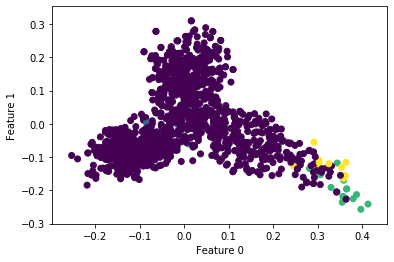

In [75]:
#e:  0.5 m: 10 bestes Ergebnis

clustering = DBSCAN(eps=0.5, min_samples=10, metric='cosine')
clusters = clustering.fit(tf_idf_array)
labels = clusters.labels_

sklearn_pca = PCA(n_components = 2)
data = sklearn_pca.fit_transform(tf_idf_array)

plt.scatter(data[:, 0], data[:, 1], c=clusters.labels_, cmap="viridis")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#plt.savefig('')

## Versuch mit TSNE

In [69]:
data1 = df[df['category'] == 'sport']
data2 = df[df['category'] == 'tech']
data3 = df[df['category'] == 'politics']

cats3 = pd.concat([data1, data2, data3], axis = 0)
cats3.head(2)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
1313,sport,001.txt,Claxton hunting first major medal,British hurdler Sarah Claxton is confident sh...,206.0,145.0,british hurdler sarah claxton is confid she c...,"['_SP', 'JJ', 'NN', 'NNP', 'NNP', 'VBZ', 'JJ',...",British confident first major next old British...,29.0,22.0,5.0
1314,sport,002.txt,O'Sullivan could run in Worlds,Sonia O'Sullivan has indicated that she would...,139.0,103.0,sonia o'sullivan ha indic that she would like...,"['_SP', 'NNP', 'NNP', 'VBZ', 'VBN', 'IN', 'PRP...",next old official Provincial last present firs...,16.0,9.0,2.0


In [70]:
from collections import Counter
Counter(cats3.category)

Counter({'sport': 511, 'tech': 401, 'politics': 417})

In [71]:
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(cats3.content)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [72]:
def dbscan(eps, min_samples, metric, array): 
    clustering = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    clusters = clustering.fit(array)
    labels = clusters.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    return 'n_clusters_', n_clusters_, 'n_noise_', n_noise_

In [46]:
eps = [0.05, 0.1, 0.5, 0.9, 1, 1.5, 10, 25, 50, 75, 100]
min_samples = [5, 10, 20, 30, 50, 75, 100]
for e in eps:
    for m in min_samples:
        print('e: ',e, 'm:',m ,dbscan(e, m, 'cosine', tf_idf_array))

e:  0.05 m: 5 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.05 m: 10 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.05 m: 20 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.05 m: 30 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.05 m: 50 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.05 m: 75 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.05 m: 100 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.1 m: 5 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.1 m: 10 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.1 m: 20 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.1 m: 30 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.1 m: 50 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.1 m: 75 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.1 m: 100 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.5 m: 5 ('n_clusters_', 18, 'n_noise_', 1180)
e:  0.5 m: 10 ('n_clusters_', 3, 'n_noise_', 1289)
e:  0.5 m: 20 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.5 m: 30 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.5 m: 50 ('n_clusters_', 0, 'n_noise_', 1329)
e:  0.5 m: 75 ('n_cluste

Text(0, 0.5, 'Feature 1')

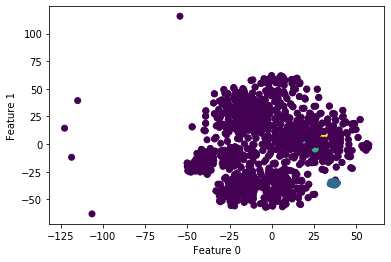

In [74]:
#e:  0.5 m: 10 bestes Ergebnis

from sklearn.manifold import TSNE

clustering = DBSCAN(eps=0.5, min_samples=10, metric='cosine')
clusters = clustering.fit(tf_idf_array)
labels = clusters.labels_


sklearn_tsne = TSNE(n_components=2)
data = sklearn_tsne.fit_transform(tf_idf_array)

#sklearn_pca = PCA(n_components = 2)
#data = sklearn_pca.fit_transform(tf_idf_array)

plt.scatter(data[:, 0], data[:, 1], c=clusters.labels_, cmap="viridis")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#plt.savefig('')

# DBScan mit Sport + Tech + Politics + Entertainment

In [36]:
data1 = df[df['category'] == 'sport']
data2 = df[df['category'] == 'tech']
data3 = df[df['category'] == 'politics']
data4 = df[df['category'] == 'entertainment']

cats4 = pd.concat([data1, data2, data3, data4], axis = 0)
cats4.head(2)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
1313,sport,001.txt,Claxton hunting first major medal,British hurdler Sarah Claxton is confident sh...,206.0,145.0,british hurdler sarah claxton is confid she c...,"['_SP', 'JJ', 'NN', 'NNP', 'NNP', 'VBZ', 'JJ',...",British confident first major next old British...,29.0,22.0,5.0
1314,sport,002.txt,O'Sullivan could run in Worlds,Sonia O'Sullivan has indicated that she would...,139.0,103.0,sonia o'sullivan ha indic that she would like...,"['_SP', 'NNP', 'NNP', 'VBZ', 'VBN', 'IN', 'PRP...",next old official Provincial last present firs...,16.0,9.0,2.0


In [37]:
from collections import Counter

Counter(cats4.category)

Counter({'sport': 511, 'tech': 401, 'politics': 417, 'entertainment': 386})

In [38]:
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(cats4.content)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [39]:
def dbscan(eps, min_samples, metric, array): 
    clustering = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    clusters = clustering.fit(array)
    labels = clusters.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    return 'n_clusters_', n_clusters_, 'n_noise_', n_noise_

In [40]:
eps = [0.05, 0.1, 0.5, 0.9, 1, 1.5, 10, 25, 50, 75, 100]
min_samples = [5, 10, 20, 30, 50, 75, 100]
for e in eps:
    for m in min_samples:
        print('e: ',e, 'm:',m ,dbscan(e, m, 'cosine', tf_idf_array))

e:  0.05 m: 5 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.05 m: 10 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.05 m: 20 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.05 m: 30 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.05 m: 50 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.05 m: 75 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.05 m: 100 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.1 m: 5 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.1 m: 10 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.1 m: 20 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.1 m: 30 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.1 m: 50 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.1 m: 75 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.1 m: 100 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.5 m: 5 ('n_clusters_', 18, 'n_noise_', 1561)
e:  0.5 m: 10 ('n_clusters_', 3, 'n_noise_', 1674)
e:  0.5 m: 20 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.5 m: 30 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.5 m: 50 ('n_clusters_', 0, 'n_noise_', 1715)
e:  0.5 m: 75 ('n_cluste

Text(0, 0.5, 'Feature 1')

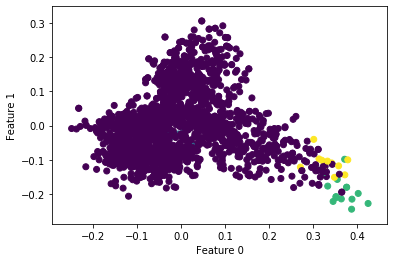

In [41]:
clustering = DBSCAN(eps=0.5, min_samples=10, metric='cosine')
clusters = clustering.fit(tf_idf_array)
labels = clusters.labels_

sklearn_pca = PCA(n_components = 2)
data = sklearn_pca.fit_transform(tf_idf_array)

plt.scatter(data[:, 0], data[:, 1], c=clusters.labels_, cmap="viridis")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#plt.savefig('')